In [1]:
 #!hostname -I
from google.colab import drive
drive.mount('/content/drive')
#
!pwd
!ls
%cd /content/drive/MyDrive/'Colab Notebooks'/DATA606Spring2023/Capstone
!pwd
!ls
import os
os.chdir("/content/drive/My Drive")
!ls

Mounted at /content/drive
/content
drive  sample_data
[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/DATA606Spring2023/Capstone'
/content
/content
drive  sample_data
'Assignment 601 INTRO. TO DATA 601.docx'
 baltimore_crime_predictions.html
 baltimore_crime_predictions_visualize.html
 baltimore_heatmap.html
 blenf1
 blenf1_Fisseha_Homework_1.ipynb
 BlenF1_Introduction_to_Stationarity_HW.ipynb
 BlenF1_Introduction_to_Time_Series_HW.ipynb
 BlenF1_Week5_Clustering.ipynb
'BlenF_Baltimore Crime Prediction Final.gslides'
'BlenF_Baltimore Crime Prediction Midterm.gslides'
'BlenF_Final Project Outline.gdoc'
 BlenFHW6.ipynb
'Blen Fisseha Capstone Project Idea.gdoc'
"Blen Fisseha's Capstone Gantt Chart.gsheet"
'BlenF_Midterm Project Outline.gdoc'
 BlenF_Week4_HW4_kMeans_Clustering_Imagery_Analysis.ipynb
 Capstone-Crime_Data.xlsx
'Capstone Project .docx'
'ChatGPT Questions.gdoc'
'Colab Notebooks'
'Colab Notebooks (1)'
'Copy of Big Data Cluster Intro.gslides'
'Copy of

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('Capstone-Crime_Data.xlsx')
df.head()

,RowID,CCNO,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,Gender,Age,Race,Ethnicity,District,Neighborhood,Latitude,Longitude,GeoLocation,Premise,Total_Incidents
0,457112,21J05978,2013/01/01 00:00:00+00,4E,1500 N CALVERT ST,COMMON ASSAULT,NaN,NaN,134,M,NaN,WHITE,NaN,CENTRAL,GREENMOUNT WEST,39.307417,-76.612977,"(39.3074169037136,-76.6129771616288)",NaN,1
1,457361,13F11552,2013/01/01 00:00:00+00,6J,4800 ROLAND AVE,LARCENY,I,NaN,534,M,83.0,WHITE,NaN,NORTHERN,ROLAND PARK,39.351873,-76.634951,"(39.3518733477081,-76.6349514692715)",ROW/TOWNHOUSE-OCC,1
2,457637,13A00040,2013/01/01 00:00:00+00,4C,2900 KINGSLEY ST,AGG. ASSAULT,I,OTHER,832,M,30.0,BLACK_OR_AFRICAN_AMERICAN,NaN,SOUTHWEST,GWYNNS FALLS,39.278277,-76.664922,"(39.278277066277,-76.664922285607)",ROW/TOWNHOUSE-OCC,1
3,457461,18G09316,2013/01/01 00:01:00+00,2A,400 GUSRYAN ST,RAPE,NaN,OTHER,232,F,14.0,UNKNOWN,NaN,SOUTHEAST,BAYVIEW,39.288516,-76.541156,"(39.2885162187034,-76.5411561824099)",NaN,1
4,457538,17G04483,2013/01/01 00:01:00+00,2A,4400 ASBURY AVE,RAPE,NaN,OTHER,442,F,17.0,BLACK_OR_AFRICAN_AMERICAN,NaN,NORTHEAST,BELAIR-EDISON,39.328874,-76.562850,"(39.3288743862718,-76.5628496254368)",NaN,1


In [4]:
len(df)

460160

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460160 entries, 0 to 460159
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   RowID            460160 non-null  int64  
 1   CCNO             460160 non-null  object 
 2   CrimeDateTime    460160 non-null  object 
 3   CrimeCode        460160 non-null  object 
 4   Location         457885 non-null  object 
 5   Description      460160 non-null  object 
 6   Inside_Outside   373452 non-null  object 
 7   Weapon           108121 non-null  object 
 8   Post             448115 non-null  object 
 9   Gender           382268 non-null  object 
 10  Age              366541 non-null  float64
 11  Race             449152 non-null  object 
 12  Ethnicity        21175 non-null   object 
 13  District         448240 non-null  object 
 14  Neighborhood     448114 non-null  object 
 15  Latitude         459702 non-null  float64
 16  Longitude        459702 non-null  floa

Data Preprocessing

In [6]:
#Converting current datetime to normal datetime
df['CrimeDateTime'] = pd.to_datetime(df['CrimeDateTime']).dt.date

In [7]:
df["Year"] = pd.DatetimeIndex(df['CrimeDateTime']).year
df['Month'] = pd.DatetimeIndex(df['CrimeDateTime']).month
df['Day'] = pd.DatetimeIndex(df['CrimeDateTime']).day
df['Hour'] = pd.DatetimeIndex(df['CrimeDateTime']).hour
df['Minute'] = pd.DatetimeIndex(df['CrimeDateTime']).minute
df.head(10)

,RowID,CCNO,CrimeDateTime,CrimeCode,Location,Description,Inside_Outside,Weapon,Post,Gender,...,Latitude,Longitude,GeoLocation,Premise,Total_Incidents,Year,Month,Day,Hour,Minute
0,457112,21J05978,2013-01-01,4E,1500 N CALVERT ST,COMMON ASSAULT,NaN,NaN,134,M,...,39.307417,-76.612977,"(39.3074169037136,-76.6129771616288)",NaN,1,2013,1,1,0,0
1,457361,13F11552,2013-01-01,6J,4800 ROLAND AVE,LARCENY,I,NaN,534,M,...,39.351873,-76.634951,"(39.3518733477081,-76.6349514692715)",ROW/TOWNHOUSE-OCC,1,2013,1,1,0,0
2,457637,13A00040,2013-01-01,4C,2900 KINGSLEY ST,AGG. ASSAULT,I,OTHER,832,M,...,39.278277,-76.664922,"(39.278277066277,-76.664922285607)",ROW/TOWNHOUSE-OCC,1,2013,1,1,0,0
3,457461,18G09316,2013-01-01,2A,400 GUSRYAN ST,RAPE,NaN,OTHER,232,F,...,39.288516,-76.541156,"(39.2885162187034,-76.5411561824099)",NaN,1,2013,1,1,0,0
4,457538,17G04483,2013-01-01,2A,4400 ASBURY AVE,RAPE,NaN,OTHER,442,F,...,39.328874,-76.562850,"(39.3288743862718,-76.5628496254368)",NaN,1,2013,1,1,0,0
5,457624,13L09672,2013-01-01,2A,5100 CRAIG AVE,RAPE,I,OTHER,524,F,...,39.350244,-76.606890,"(39.3502443089978,-76.6068899446631)",ROW/TOWNHOUSE-OCC,1,2013,1,1,0,0
6,457629,13C13322,2013-01-01,5D,2800 MOSHER ST,BURGLARY,I,NaN,721,NaN,...,39.299350,-76.663660,"(39.299349514203,-76.6636599739375)",ROW/TOWNHOUSE-OCC,1,2013,1,1,0,0
7,457635,18K00193,2013-01-01,2A,3000 W GARRISON AVE,RAPE,I,OTHER,614,F,...,39.348571,-76.671833,"(39.3485710386915,-76.671832812179)",ROW/TOWNHOUSE-OCC,1,2013,1,1,0,0
8,457719,13A00550,2013-01-01,7A,800 VINE ST,AUTO THEFT,NaN,NaN,712,F,...,39.290431,-76.631498,"(39.2904312727562,-76.6314975605697)",NaN,1,2013,1,1,0,0
9,457026,13A00002,2013-01-01,4B,200 LIGHT ST,AGG. ASSAULT,O,KNIFE,113,M,...,39.286276,-76.613979,"(39.2862763964354,-76.613979038347)",STREET,1,2013,1,1,0,0


In [8]:
print(df.isnull().sum())

RowID                   0
CCNO                    0
CrimeDateTime           0
CrimeCode               0
Location             2275
Description             0
Inside_Outside      86708
Weapon             352039
Post                12045
Gender              77892
Age                 93619
Race                11008
Ethnicity          438985
District            11920
Neighborhood        12046
Latitude              458
Longitude             458
GeoLocation             0
Premise             87004
Total_Incidents         0
Year                    0
Month                   0
Day                     0
Hour                    0
Minute                  0
dtype: int64


In [9]:
df = df.drop(["Age", "Gender", "Race", "Ethnicity", "Weapon", "CCNO", "Inside_Outside", "Premise", "Total_Incidents"], axis = 1)

Exploratory Analysis

In [10]:
df['Description'].unique()

array(['COMMON ASSAULT', 'LARCENY', 'AGG. ASSAULT', 'RAPE', 'BURGLARY',
       'AUTO THEFT', 'LARCENY FROM AUTO', 'ROBBERY', 'ARSON',
       'ROBBERY - COMMERCIAL', 'HOMICIDE', 'ROBBERY - CARJACKING',
       'SHOOTING'], dtype=object)

In [11]:
df['Description'].value_counts()

LARCENY                 103092
COMMON ASSAULT           82752
BURGLARY                 61117
LARCENY FROM AUTO        58207
AGG. ASSAULT             53382
AUTO THEFT               40075
ROBBERY                  37642
SHOOTING                  6088
ROBBERY - COMMERCIAL      5264
ROBBERY - CARJACKING      4409
HOMICIDE                  3159
RAPE                      3026
ARSON                     1947
Name: Description, dtype: int64

Data Visualization

<Axes: title={'center': 'Number of Unqiue Crimes in Baltimore'}>

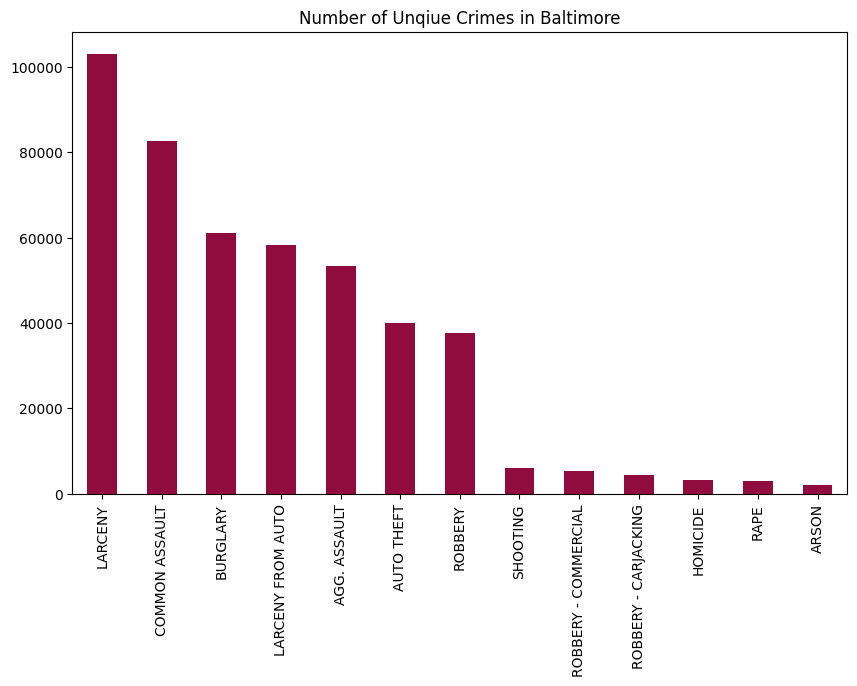

In [73]:
plt.figure(figsize=(10,6))
df['Description'].value_counts().plot(kind='bar', color='#900C3F',title ='Number of Unqiue Crimes in Baltimore')

<Axes: title={'center': 'Total Crimes Per Year'}, xlabel='Year'>

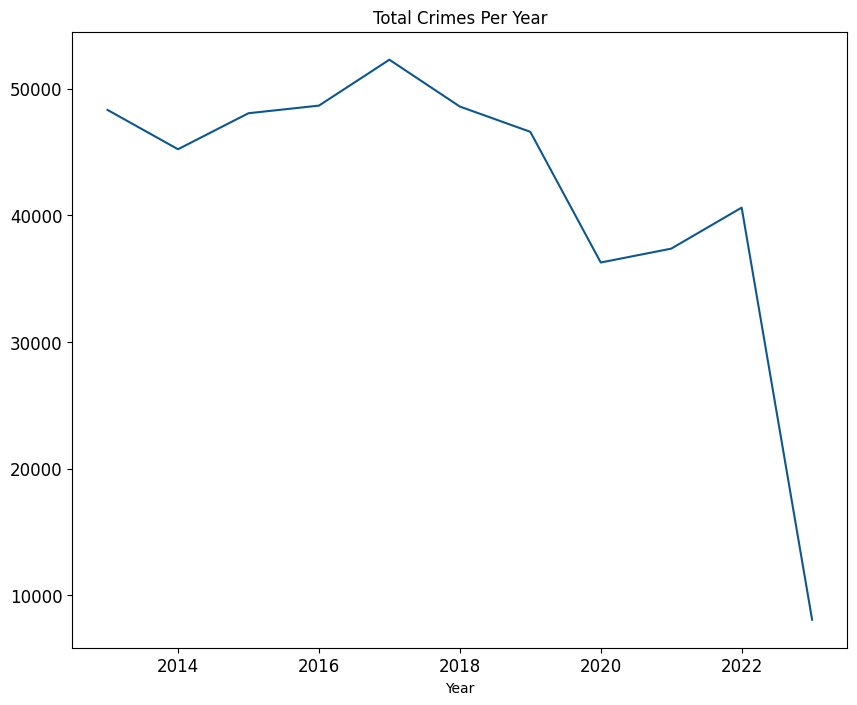

In [13]:
#Based on the live graph below, it appears the number of crimes have plumented from mid 2018 to 2022. This could be due to the mass shutdown during COVID
plt.figure(figsize=(10,8))
df.groupby('Year').size().plot(kind = 'line', color = '#0C5790', title='Total Crimes Per Year', fontsize=12)

<Axes: title={'center': 'Total Crimes Per Month'}, xlabel='Months', ylabel='Number of Crimes'>

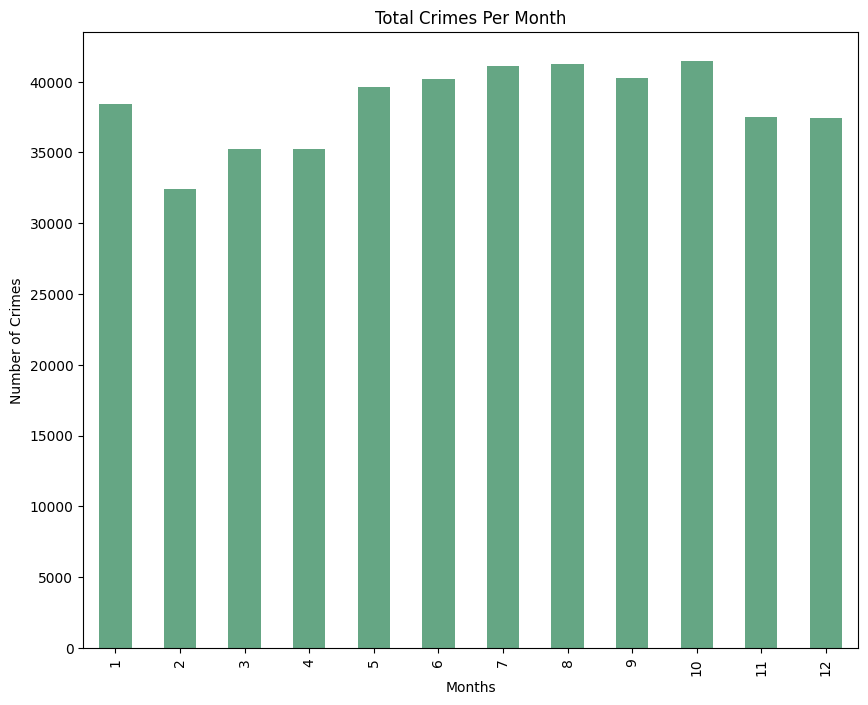

In [14]:
plt.figure(figsize=(10,8))
df.groupby(('Month')).size().plot(kind ='bar', color = '#65A684', title = 'Total Crimes Per Month', xlabel='Months', ylabel='Number of Crimes')

<Figure size 2000x1000 with 0 Axes>

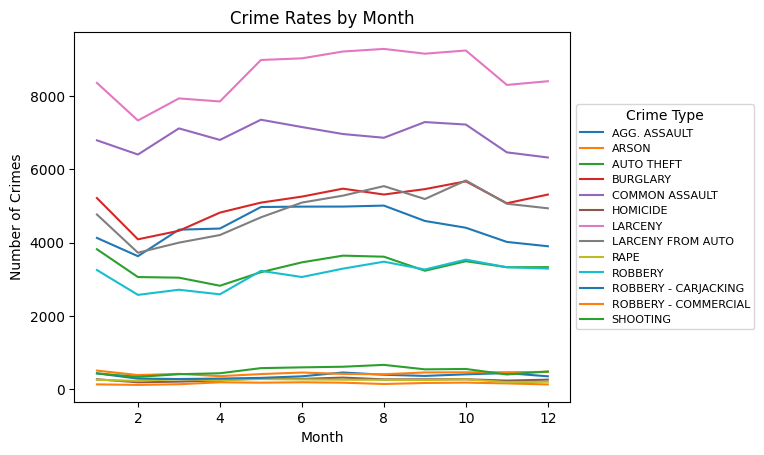

In [15]:
plt.figure(figsize=(20,10))
#df.groupby(('Month','Description')).size().plot(kind ='bar', color = '#E6E271', title = 'Crime Rates by Month Based on Type of Crime')

crime_counts = df.groupby(['Month', 'Description'])['CrimeDateTime'].count()

# Pivot table to reshape data for plotting
crime_counts = crime_counts.reset_index().pivot(index='Month', columns='Description', values='CrimeDateTime')

# Plot line chart
crime_counts.plot()
plt.title('Crime Rates by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type',loc='center left', bbox_to_anchor=(1,0.5), fontsize=8, markerscale=0.5)
plt.show()

In [16]:
df.isna().sum()

RowID                0
CrimeDateTime        0
CrimeCode            0
Location          2275
Description          0
Post             12045
District         11920
Neighborhood     12046
Latitude           458
Longitude          458
GeoLocation          0
Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [17]:
df_geo = df.dropna(subset=['Latitude', 'Longitude'])

In [18]:
df_geo.isna().sum()

RowID                0
CrimeDateTime        0
CrimeCode            0
Location          2061
Description          0
Post             11587
District         11462
Neighborhood     11588
Latitude             0
Longitude            0
GeoLocation          0
Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [19]:
import folium
from folium.plugins import HeatMap

# Filter the data to include only the necessary columns for the heat map
heatmap_data = df_geo[["Latitude", "Longitude", "Description"]]

# Create a list to store the heat map data for each crime type
heat_data_list = []

# Create a list to store the crime types
crime_types = []

# Iterate over each crime type
for description in heatmap_data["Description"].unique():
    filtered_data = heatmap_data[heatmap_data["Description"] == description]
    heat_data = filtered_data[["Latitude", "Longitude"]].values
    heat_data_list.append(heat_data)
    crime_types.append(description)

# Create a folium map centered around Baltimore
baltimore_map = folium.Map(location=[39.2904, -76.6122], zoom_start=12)

# Create a HeatMap layer for each crime type
for heat_data, crime_type in zip(heat_data_list, crime_types):
    HeatMap(heat_data, name=crime_type).add_to(baltimore_map)

# Add layer control to the map
folium.LayerControl().add_to(baltimore_map)

# Display the map
baltimore_map


Output hidden; open in https://colab.research.google.com to view.

In [20]:
unique_crime_types = heatmap_data["Description"].unique()
print(unique_crime_types)

['COMMON ASSAULT' 'LARCENY' 'AGG. ASSAULT' 'RAPE' 'BURGLARY' 'AUTO THEFT'
 'LARCENY FROM AUTO' 'ROBBERY' 'ARSON' 'ROBBERY - COMMERCIAL' 'HOMICIDE'
 'ROBBERY - CARJACKING' 'SHOOTING']


Four Specific Crimes

In [21]:
#Create a dataframe based on four frequent different crimes
description_filtered = df_geo['Description'].isin(['LARCENY', 'COMMON ASSAULT', 'BURGLARY', 'AGG. ASSAULT']) 
df_new = df_geo[description_filtered]

In [22]:
df_new.isna().sum()

RowID               0
CrimeDateTime       0
CrimeCode           0
Location         1104
Description         0
Post             6280
District         6207
Neighborhood     6281
Latitude            0
Longitude           0
GeoLocation         0
Year                0
Month               0
Day                 0
Hour                0
Minute              0
dtype: int64

In [23]:
df_new = df_new.dropna()

<Axes: title={'center': 'Total Crimes Based on Description'}, xlabel='Description'>

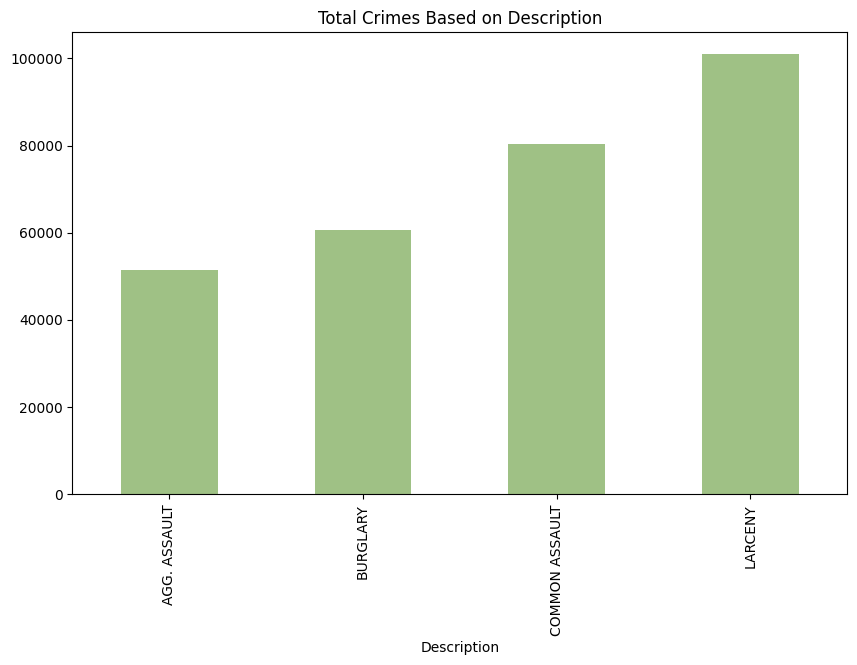

In [24]:
plt.figure(figsize=(10,6))
df_new.groupby('Description').size().plot(kind = 'bar', color = '#9FC185', title='Total Crimes Based on Description')

<Figure size 2000x1000 with 0 Axes>

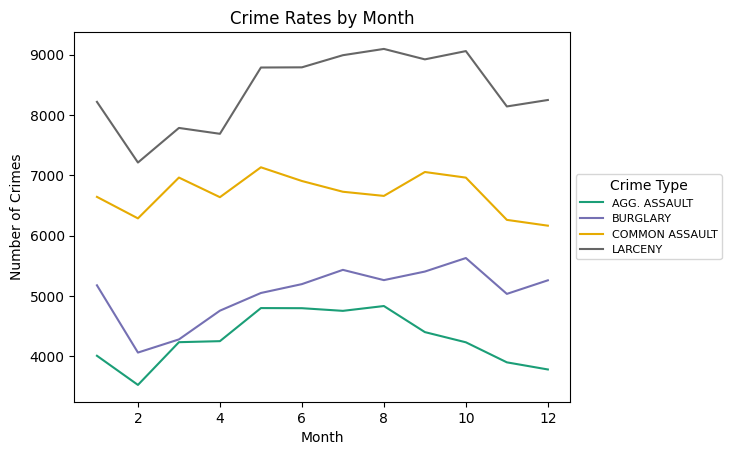

In [25]:
plt.figure(figsize=(20,10))
#df.groupby(('Month','Description')).size().plot(kind ='bar', color = '#E6E271', title = 'Crime Rates by Month Based on Type of Crime')

crime_counts = df_new.groupby(['Month', 'Description'])['CrimeDateTime'].count()

# Pivot table to reshape data for plotting
crime_counts = crime_counts.reset_index().pivot(index='Month', columns='Description', values='CrimeDateTime')

# Define a color map
colors = plt.get_cmap('Dark2')

# Plot line chart
crime_counts.plot(colormap=colors)
plt.title('Crime Rates by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type',loc='center left', bbox_to_anchor=(1,0.5), fontsize=8, markerscale=0.5)
plt.show()

<Figure size 2000x1000 with 0 Axes>

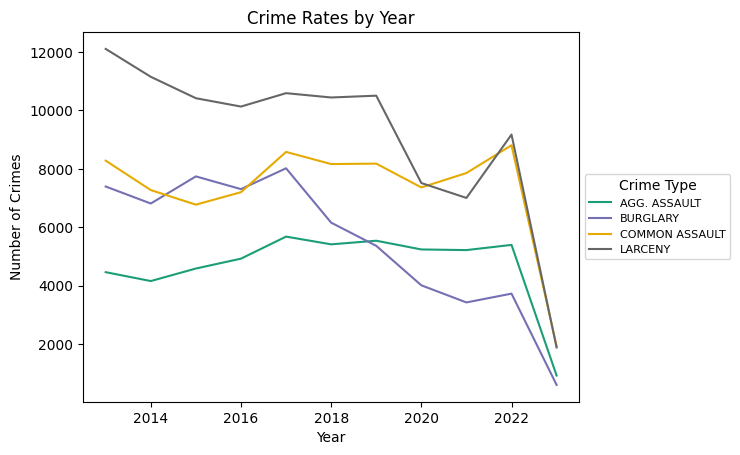

In [26]:
plt.figure(figsize=(20,10))

ycrime_counts = df_new.groupby(['Year', 'Description'])['CrimeDateTime'].count()

# Pivot table to reshape data for plotting
ycrime_data = ycrime_counts.reset_index().pivot(index='Year', columns='Description', values='CrimeDateTime')

# Plot line chart
ycrime_data.plot(colormap=colors)
plt.title('Crime Rates by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type',loc='center left', bbox_to_anchor=(1,0.5), fontsize=8, markerscale=0.5)
plt.show()

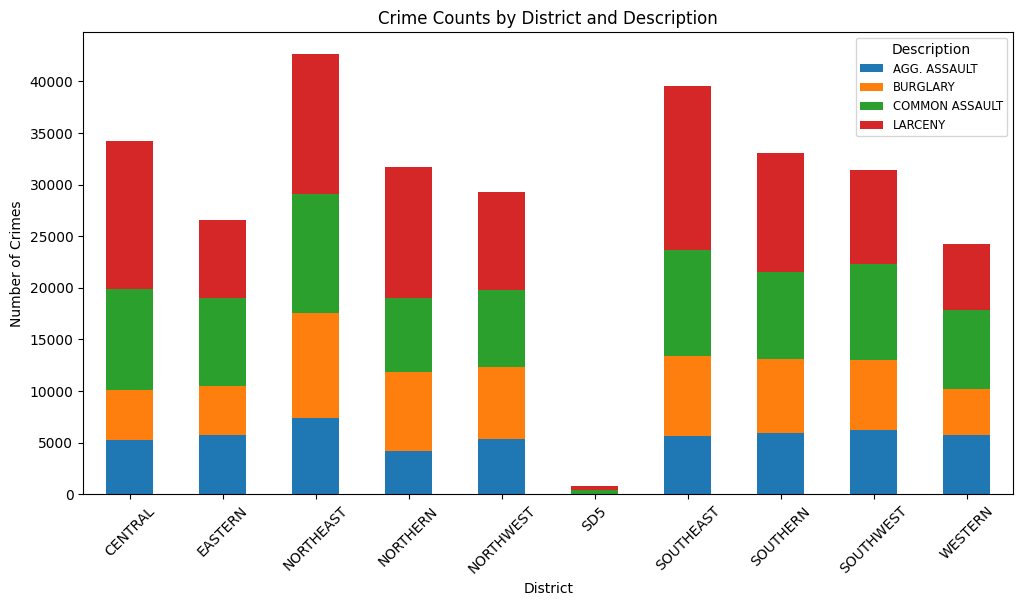

In [74]:
import matplotlib.pyplot as plt

# Group the data by 'District' and 'Description' and count the occurrences
crime_counts = df_new.groupby(['District', 'Description']).size().unstack()

# Plot the bar chart
crime_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crime Counts by District and Description')
plt.xlabel('District')
plt.ylabel('Number of Crimes')
plt.legend(title='Description', fontsize='small')
plt.xticks(rotation=45)
plt.show()


In [27]:
Larceny = df_new[df_new.Description.str.contains("LARCENY")]
Common_Assault = df_new[df_new.Description.str.contains("COMMON ASSAULT")]
Burglary = df_new[df_new.Description.str.contains("BURGLARY")]
Agg_Assault = df_new[df_new.Description.str.contains("AGG. ASSAULT")]

Text(0.5, 1.0, 'Larceny')

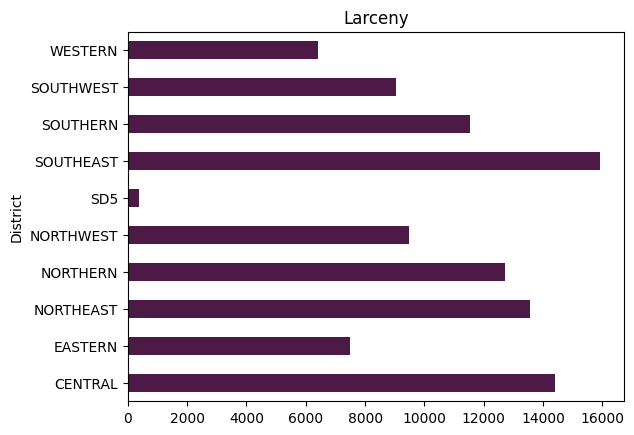

In [28]:
Larceny.groupby("District").size().plot(kind = "barh", color="#4D1A47")
plt.title("Larceny")

Text(0.5, 1.0, 'Common Assault')

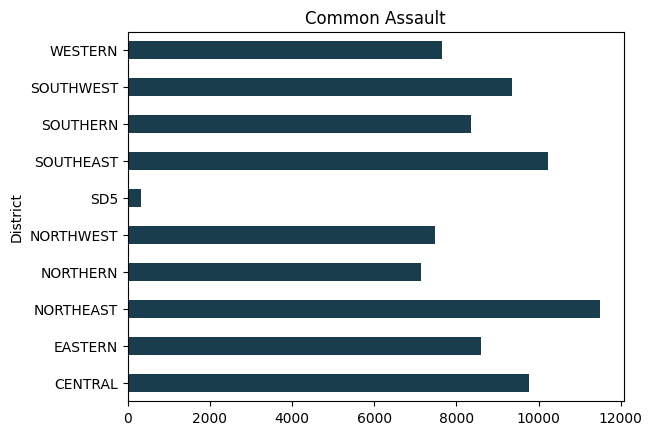

In [29]:
Common_Assault.groupby("District").size().plot(kind = "barh", color="#1A3D4D")
plt.title("Common Assault")

Text(0.5, 1.0, 'AGG. ASSAULT')

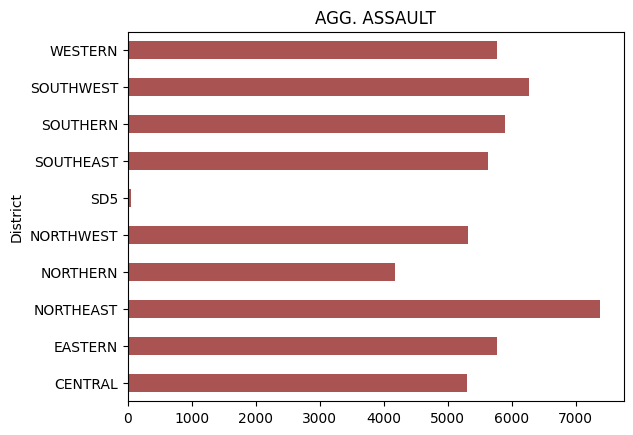

In [30]:
Agg_Assault.groupby("District").size().plot(kind = "barh", color="#A95353")
plt.title("AGG. ASSAULT")

Text(0.5, 1.0, 'BURGLARY')

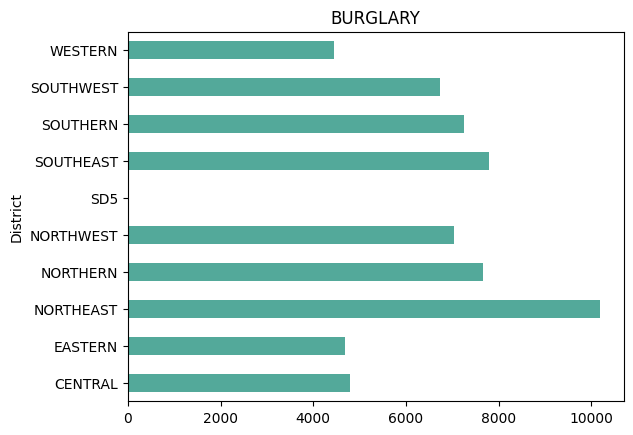

In [31]:
Burglary.groupby("District").size().plot(kind = "barh", color="#53A99A")
plt.title("BURGLARY")

Data Standardization



In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [33]:
df_new.isna().sum()

RowID            0
CrimeDateTime    0
CrimeCode        0
Location         0
Description      0
Post             0
District         0
Neighborhood     0
Latitude         0
Longitude        0
GeoLocation      0
Year             0
Month            0
Day              0
Hour             0
Minute           0
dtype: int64

In [34]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293482 entries, 0 to 460158
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   RowID          293482 non-null  int64  
 1   CrimeDateTime  293482 non-null  object 
 2   CrimeCode      293482 non-null  object 
 3   Location       293482 non-null  object 
 4   Description    293482 non-null  object 
 5   Post           293482 non-null  object 
 6   District       293482 non-null  object 
 7   Neighborhood   293482 non-null  object 
 8   Latitude       293482 non-null  float64
 9   Longitude      293482 non-null  float64
 10  GeoLocation    293482 non-null  object 
 11  Year           293482 non-null  int64  
 12  Month          293482 non-null  int64  
 13  Day            293482 non-null  int64  
 14  Hour           293482 non-null  int64  
 15  Minute         293482 non-null  int64  
dtypes: float64(2), int64(6), object(8)
memory usage: 38.1+ MB


In [35]:
from sklearn.preprocessing import OneHotEncoder
le= preprocessing.LabelEncoder()
# Create a copy of the DataFrame
df_new_copy = df_new.copy()
df_new_copy["Neighborhood"] = le.fit_transform(df_new_copy["Neighborhood"])
df_new_copy["District"] = le.fit_transform(df_new_copy["District"])
df_new_copy["CrimeCode"] = le.fit_transform(df_new_copy["CrimeCode"])
df_new_copy["Description"] = le.fit_transform(df_new_copy["Description"])
df_new_copy.head(5)

,RowID,CrimeDateTime,CrimeCode,Location,Description,Post,District,Neighborhood,Latitude,Longitude,GeoLocation,Year,Month,Day,Hour,Minute
0,457112,2013-01-01,4,1500 N CALVERT ST,2,134,0,187,39.307417,-76.612977,"(39.3074169037136,-76.6129771616288)",2013,1,1,0,0
1,457361,2013-01-01,19,4800 ROLAND AVE,3,534,3,425,39.351873,-76.634951,"(39.3518733477081,-76.6349514692715)",2013,1,1,0,0
2,457637,2013-01-01,2,2900 KINGSLEY ST,0,832,8,191,39.278277,-76.664922,"(39.278277066277,-76.664922285607)",2013,1,1,0,0
6,457629,2013-01-01,8,2800 MOSHER ST,1,721,9,311,39.299350,-76.663660,"(39.299349514203,-76.6636599739375)",2013,1,1,0,0
9,457026,2013-01-01,1,200 LIGHT ST,0,113,0,119,39.286276,-76.613979,"(39.2862763964354,-76.613979038347)",2013,1,1,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

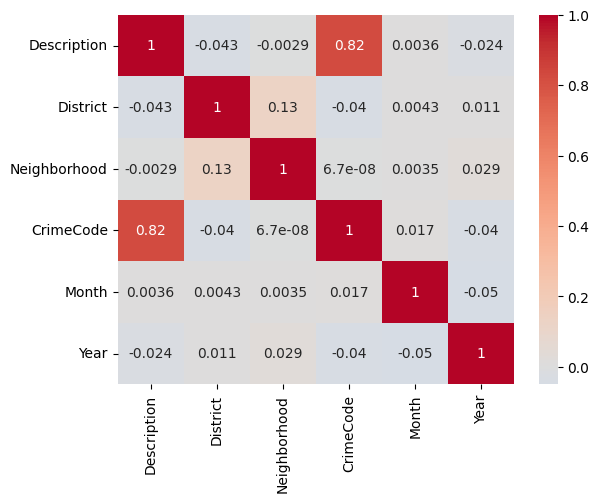

In [36]:
# Select columns for correlation matrix
cols = ['Description', 'District', 'Neighborhood', 'CrimeCode','Month', 'Year']

# Calculate correlation matrix
corr_matrix = df_new_copy[cols].corr()

# Display the correlation matrix using a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True)
plt.show

In [37]:
df_new_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293482 entries, 0 to 460158
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   RowID          293482 non-null  int64  
 1   CrimeDateTime  293482 non-null  object 
 2   CrimeCode      293482 non-null  int64  
 3   Location       293482 non-null  object 
 4   Description    293482 non-null  int64  
 5   Post           293482 non-null  object 
 6   District       293482 non-null  int64  
 7   Neighborhood   293482 non-null  int64  
 8   Latitude       293482 non-null  float64
 9   Longitude      293482 non-null  float64
 10  GeoLocation    293482 non-null  object 
 11  Year           293482 non-null  int64  
 12  Month          293482 non-null  int64  
 13  Day            293482 non-null  int64  
 14  Hour           293482 non-null  int64  
 15  Minute         293482 non-null  int64  
dtypes: float64(2), int64(10), object(4)
memory usage: 38.1+ MB


In [38]:
print("Shape of input data:", df_new_copy.shape)

Shape of input data: (293482, 16)


Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# select the features and target variable
features = ['District', 'Neighborhood', 'CrimeCode','Month', 'Year']
target = ['Description']

# split the data into training and testing sets
train, test = train_test_split(df_new_copy, test_size=0.3, random_state=42)


# create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# train the model on the training data
rf.fit(train[features], train[target].values.ravel())

# make predictions on the testing data
predictions = rf.predict(test[features])

# evaluate the accuracy of the model
accuracy = accuracy_score(test[target], predictions)
print('Accuracy:', accuracy)


Accuracy: 1.0


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# select the features and target variable
features = df_new_copy[['District', 'Neighborhood','CrimeCode', 'Month', 'Year']]
target = df_new_copy['Description']

clf = RandomForestClassifier()

# Specify the number of folds (e.g., 5-fold cross-validation)
num_folds = 5

# Perform cross-validation
clf_scores = cross_val_score(clf, features, target, cv=num_folds)

# Print the accuracy scores for each fold
print("Accuracy scores:", clf_scores)

# Calculate and print the mean accuracy score
mean_accuracy = clf_scores.mean()
print("Mean accuracy:", mean_accuracy)

Accuracy scores: [0.76486021 1.         1.         1.         0.79947526]
Mean accuracy: 0.912867095337964


In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Assuming you have defined your features (X) and target variable (y)

clf = RandomForestClassifier()

# Perform cross-validation predictions
y_pred = cross_val_predict(clf, features, target, cv=5)

# Generate classification report
report = classification_report(target, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     51553
           1       0.83      0.82      0.82     60574
           2       0.87      0.90      0.88     80414
           3       1.00      1.00      1.00    100941

    accuracy                           0.93    293482
   macro avg       0.92      0.92      0.92    293482
weighted avg       0.93      0.93      0.93    293482



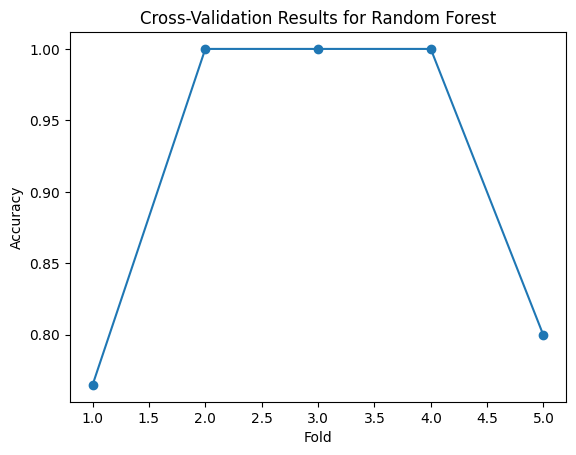

In [51]:
plt.plot(range(1, 6), clf_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results for Random Forest')
plt.show()

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split

# Select the features and target variable
features = df_new_copy[['District', 'Neighborhood', 'CrimeCode', 'Month', 'Year']]
target = df_new_copy['Description']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create the RandomForestClassifier
clf_split = RandomForestClassifier()

# Fit the model on the training data
clf_split.fit(X_train, y_train)

# Perform cross-validation on the training data
num_folds = 5
clf1_scores = cross_val_score(clf_split, X_train, y_train, cv=num_folds)

# Print the accuracy scores for each fold
print("Accuracy scores:", clf1_scores)

# Calculate and print the mean accuracy score
mean_accuracy = clf1_scores.mean()
print("Mean accuracy:", mean_accuracy)

# Evaluate the model on the testing data
test_accuracy = clf_split.score(X_test, y_test)
print("Testing accuracy:", test_accuracy)

Accuracy scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Testing accuracy: 1.0


In [54]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Assuming you have defined your features (X) and target variable (y)

clf_split = RandomForestClassifier()

# Perform cross-validation predictions
y_pred = cross_val_predict(clf_split, features, target, cv=5)

# Generate classification report
report = classification_report(target, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     51553
           1       0.67      0.81      0.73     60574
           2       0.85      0.81      0.83     80414
           3       1.00      1.00      1.00    100941

    accuracy                           0.88    293482
   macro avg       0.88      0.86      0.87    293482
weighted avg       0.89      0.88      0.88    293482



XGBoost Decision Tree Model 

In [55]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
# select the features and target variable
features = ['District', 'Neighborhood','CrimeCode', 'Month', 'Year']
target = ['Description']

# split the data into training and testing sets
train, test = train_test_split(df_new_copy, test_size=0.3, random_state=42)
# Create XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model on the training data
xgb_model.fit(train[features], train[target].values.ravel())

# Make predictions on the test data
y_pred = xgb_model.predict(test[features])

# Calculate the accuracy of the model
accuracy = accuracy_score(test[target], y_pred)
print('Accuracy:', accuracy)


Accuracy: 1.0


In [56]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

# Select the features and target variable
features = df_new_copy[['District', 'Neighborhood', 'CrimeCode', 'Month', 'Year']]
target = df_new_copy['Description']

# Create the XGBoost classifier object
xgb_classifier = xgb.XGBClassifier()

# Perform cross-validation
xgb_scores = cross_val_score(xgb_classifier, features, target, cv=5)  # Specify the number of folds (cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", xgb_scores)
print("Mean Accuracy:", xgb_scores.mean())


Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Assuming you have defined your features (X) and target variable (y)

xgb_classifier = xgb.XGBClassifier()

# Perform cross-validation predictions
xgb_y_pred = cross_val_predict(xgb_classifier, features, target, cv=5)

# Generate classification report
xgb_report = classification_report(target, xgb_y_pred)

print(xgb_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     51553
           1       1.00      1.00      1.00     60574
           2       1.00      1.00      1.00     80414
           3       1.00      1.00      1.00    100941

    accuracy                           1.00    293482
   macro avg       1.00      1.00      1.00    293482
weighted avg       1.00      1.00      1.00    293482



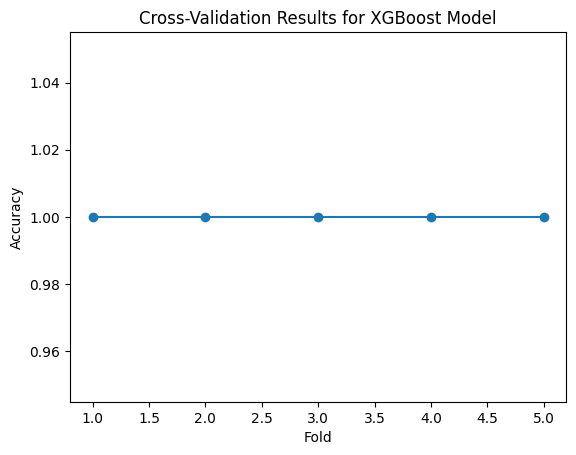

In [58]:
plt.plot(range(1, 6), xgb_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results for XGBoost Model')
plt.show()

In [76]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, train_test_split

# Select the features and target variable
features = df_new_copy[['District', 'Neighborhood','CrimeCode', 'Month', 'Year']]
target = df_new_copy['Description']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create the XGBoost classifier object
xgb1_classifier = xgb.XGBClassifier()

# Perform cross-validation on the training data
num_folds = 5
xgb1_scores = cross_val_score(xgb1_classifier, X_train, y_train, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", xgb1_scores)
print("Mean Accuracy:", xgb1_scores.mean())

# Fit the model on the training data
xgb1_classifier.fit(X_train, y_train)

# Evaluate the model on the testing data
test_accuracy = xgb1_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Testing Accuracy: 1.0


In [60]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Assuming you have defined your features (X) and target variable (y)

xgb1_classifier = RandomForestClassifier()

# Perform cross-validation predictions
y_pred = cross_val_predict(xgb1_classifier, features, target, cv=5)

# Generate classification report
report = classification_report(target, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     51553
           1       0.72      0.82      0.77     60574
           2       0.86      0.84      0.85     80414
           3       1.00      1.00      1.00    100941

    accuracy                           0.90    293482
   macro avg       0.90      0.88      0.89    293482
weighted avg       0.90      0.90      0.90    293482



Naive Bayes

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

# select the features and target variable
features = ['District', 'Neighborhood','CrimeCode', 'Month', 'Year']
target = ['Description']

# split the data into training and testing sets
train, test = train_test_split(df_new_copy, test_size=0.3, random_state=42)

# Create Naive Bayes classifer object
gnb = GaussianNB()
gnb.fit(train[features], train[target].values.ravel())

# Predict the labels for testing set
predictions = gnb.predict(test[features])

# Calculate the accuracy of the classifier on the testing set
accuracy = accuracy_score(test[target], predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9999204952013175


In [62]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Select the features and target variable
features = df_new_copy[['District', 'Neighborhood', 'CrimeCode', 'Month', 'Year']]
target = df_new_copy['Description']

# Create the XGBoost classifier object
gnb_classifier = GaussianNB()

# Perform cross-validation
gnb_scores = cross_val_score(gnb_classifier, features, target, cv=5)  # Specify the number of folds (cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", gnb_scores)
print("Mean Accuracy:", gnb_scores.mean())

Cross-Validation Scores: [0.97979454 1.         0.99998296 0.99984667 0.96301281]
Mean Accuracy: 0.988527396093301


In [63]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Assuming you have defined your features (X) and target variable (y)

gnb = GaussianNB()

# Perform cross-validation predictions
gnb_y_pred = cross_val_predict(gnb, features, target, cv=5)

# Generate classification report
gnb_report = classification_report(target, gnb_y_pred)

print(gnb_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     51553
           1       0.98      0.96      0.97     60574
           2       1.00      1.00      1.00     80414
           3       0.98      1.00      0.99    100941

    accuracy                           0.99    293482
   macro avg       0.99      0.99      0.99    293482
weighted avg       0.99      0.99      0.99    293482



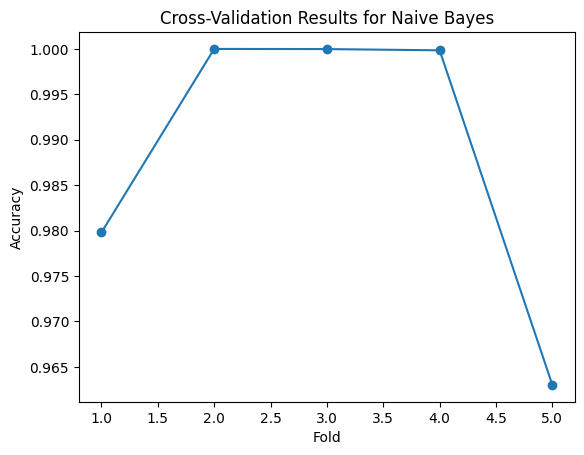

In [64]:
plt.plot(range(1, 6), gnb_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Results for Naive Bayes')
plt.show()

In [66]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split

# Select the features and target variable
features = df_new_copy[['District', 'Neighborhood', 'CrimeCode', 'Month', 'Year']]
target = df_new_copy['Description']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Create the Gaussian Naive Bayes classifier object
gnb1_classifier = GaussianNB()

# Perform cross-validation on the training data
num_folds = 5
gnb1_scores = cross_val_score(gnb1_classifier, X_train, y_train, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", gnb1_scores)
print("Mean Accuracy:", gnb1_scores.mean())

# Fit the model on the training data
gnb1_classifier.fit(X_train, y_train)

# Evaluate the model on the testing data
test_accuracy = gnb1_classifier.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)

Cross-Validation Scores: [0.99992699 0.99990265 0.99995132 0.99995132 0.99992698]
Mean Accuracy: 0.9999318527532605
Testing Accuracy: 0.9999204952013175


In [67]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

# Assuming you have defined your features (X) and target variable (y)

gnb1_classifier = GaussianNB()

# Perform cross-validation predictions
gnb1_y_pred = cross_val_predict(gnb1_classifier, features, target, cv=5)

# Generate classification report
gnb1_report = classification_report(target, gnb1_y_pred)

print(gnb_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     51553
           1       0.98      0.96      0.97     60574
           2       1.00      1.00      1.00     80414
           3       0.98      1.00      0.99    100941

    accuracy                           0.99    293482
   macro avg       0.99      0.99      0.99    293482
weighted avg       0.99      0.99      0.99    293482



Neural Network

In [51]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Split the dataset into features and target
features = ['District', 'Neighborhood','CrimeCode', 'Month', 'Year']
target = ['Description']
X = df_new_copy[features]
y = df_new_copy[target]

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values.ravel())

# One-hot encode the target variable
one_hot_encoder = OneHotEncoder(sparse=False)
y = one_hot_encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(14, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 14)                910       
                                                                 
Total params: 1,294
Trainable params: 1,294
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Initialize the model
model = tf.keras.models.Sequential()

# Add the input layer and the first hidden layer
model.add(tf.keras.layers.Dense(units=6, activation='relu', input_dim=5))

# Add the output layer
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on the testing data
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/50
6420/6420 [==============================] - 7s 1ms/step - loss: 17.1654 - accuracy: 0.6655
Epoch 2/50
6420/6420 [==============================] - 7s 1ms/step - loss: 0.2947 - accuracy: 0.8835
Epoch 3/50
6420/6420 [==============================] - 7s 1ms/step - loss: 0.1253 - accuracy: 0.9770
Epoch 4/50
6420/6420 [==============================] - 7s 1ms/step - loss: 0.0436 - accuracy: 0.9976
Epoch 5/50
6420/6420 [==============================] - 7s 1ms/step - loss: 0.0144 - accuracy: 0.9995
Epoch 6/50
6420/6420 [==============================] - 7s 1ms/step - loss: 0.0047 - accuracy: 0.9999
Epoch 7/50
6420/6420 [==============================] - 7s 1ms/step - loss: 0.0029 - accuracy: 0.9996
Epoch 8/50
6420/6420 [==============================] - 7s 1ms/step - loss: 0.0025 - accuracy: 0.9996
Epoch 9/50
6420/6420 [==============================] - 7s 1ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 10/50
6420/6420 [==============================] - 7s 1ms/step - loss: 0.00

In [53]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Split the dataset into features and target
features = ['District', 'Neighborhood', 'CrimeCode', 'Month', 'Year']
target = ['Description']
X = df_new_copy[features]
y = df_new_copy[target]

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values.ravel())

# Perform K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

accuracies = []  # List to store cross-validation accuracies

for train_index, val_index in kf.split(X):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(accuracy)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)

Mean Accuracy: 1.0


In [71]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Split the dataset into features and target
features = ['District', 'Neighborhood', 'CrimeCode', 'Month', 'Year']
target = ['Description']
X = df_new_copy[features]
y = df_new_copy[target]

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values.ravel())

# Perform K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

accuracies = []  # List to store cross-validation accuracies
predictions = []  # List to store predicted labels

for train_index, val_index in kf.split(X):
    # Split data into training and validation sets
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(accuracy)

    # Predict probabilities for the validation set
    y_prob = model.predict(X_val)
    y_pred = np.argmax(y_prob, axis=1)
    predictions.append(y_pred)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print("Mean Accuracy:", mean_accuracy)

# Concatenate the predicted labels from all folds
y_pred_all = np.concatenate(predictions)

# Decode the predicted labels
y_pred_all_decoded = label_encoder.inverse_transform(y_pred_all)

# Decode the true labels
y_true_decoded = label_encoder.inverse_transform(y)

# Generate and print the classification report
report = classification_report(y_true_decoded, y_pred_all_decoded)
print("Classification Report:\n", report)

1835/1835 [==============================] - 2s 1ms/step
Mean Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.18      0.18      0.18     51553
           1       0.21      0.21      0.21     60574
           2       0.27      0.27      0.27     80414
           3       0.34      0.34      0.34    100941

    accuracy                           0.27    293482
   macro avg       0.25      0.25      0.25    293482
weighted avg       0.27      0.27      0.27    293482



In [72]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_dim=X.shape[1]))
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Split the dataset into features and target
features = ['District', 'Neighborhood', 'CrimeCode', 'Month', 'Year']
target = ['Description']
X = df_new_copy[features]
y = df_new_copy[target]

# Label encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values.ravel())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the model
model = create_model()

# Fit the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Evaluate the model on the testing data
_, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy:", test_accuracy)

# Perform K-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

accuracies = []  # List to store cross-validation accuracies
predictions = []  # List to store predicted labels

for train_index, val_index in kf.split(X_train):
    # Split data into training and validation sets
    X_train_fold, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val = y_train[train_index], y_train[val_index]

    # Create and train the model
    model = create_model()
    model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

    # Evaluate the model on the validation set
    _, accuracy = model.evaluate(X_val, y_val, verbose=0)
    accuracies.append(accuracy)

    # Predict probabilities for the validation set
    y_prob = model.predict(X_val)
    y_pred = np.argmax(y_prob, axis=1)
    predictions.append(y_pred)

# Calculate and print the mean accuracy across all folds
mean_accuracy = np.mean(accuracies)
print("Cross-Validation Accuracy:", mean_accuracy)

# Concatenate the predicted labels from all folds
y_pred_all = np.concatenate(predictions)

# Decode the predicted labels
y_pred_all_decoded = label_encoder.inverse_transform(y_pred_all)

# Decode the true labels
y_true_decoded = label_encoder.inverse_transform(y_train)

# Generate and print the classification report
report = classification_report(y_true_decoded, y_pred_all_decoded)
print("Classification Report:\n", report)

Testing Accuracy: 1.0
1284/1284 [==============================] - 2s 2ms/step
Cross-Validation Accuracy: 0.9999951362609864
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.17      0.17     35870
           1       0.21      0.21      0.21     42525
           2       0.28      0.28      0.28     56420
           3       0.34      0.34      0.34     70622

    accuracy                           0.27    205437
   macro avg       0.25      0.25      0.25    205437
weighted avg       0.27      0.27      0.27    205437

